In [1]:
import numpy as np
import scipy.optimize as optim
import matplotlib.pyplot as plt
from tqdm import tqdm

import sys
sys.path.append('Library')

import drop_detection_tools as ddt

%matplotlib notebook

## Get the dataset of the slow drops

<IPython.core.display.Javascript object>


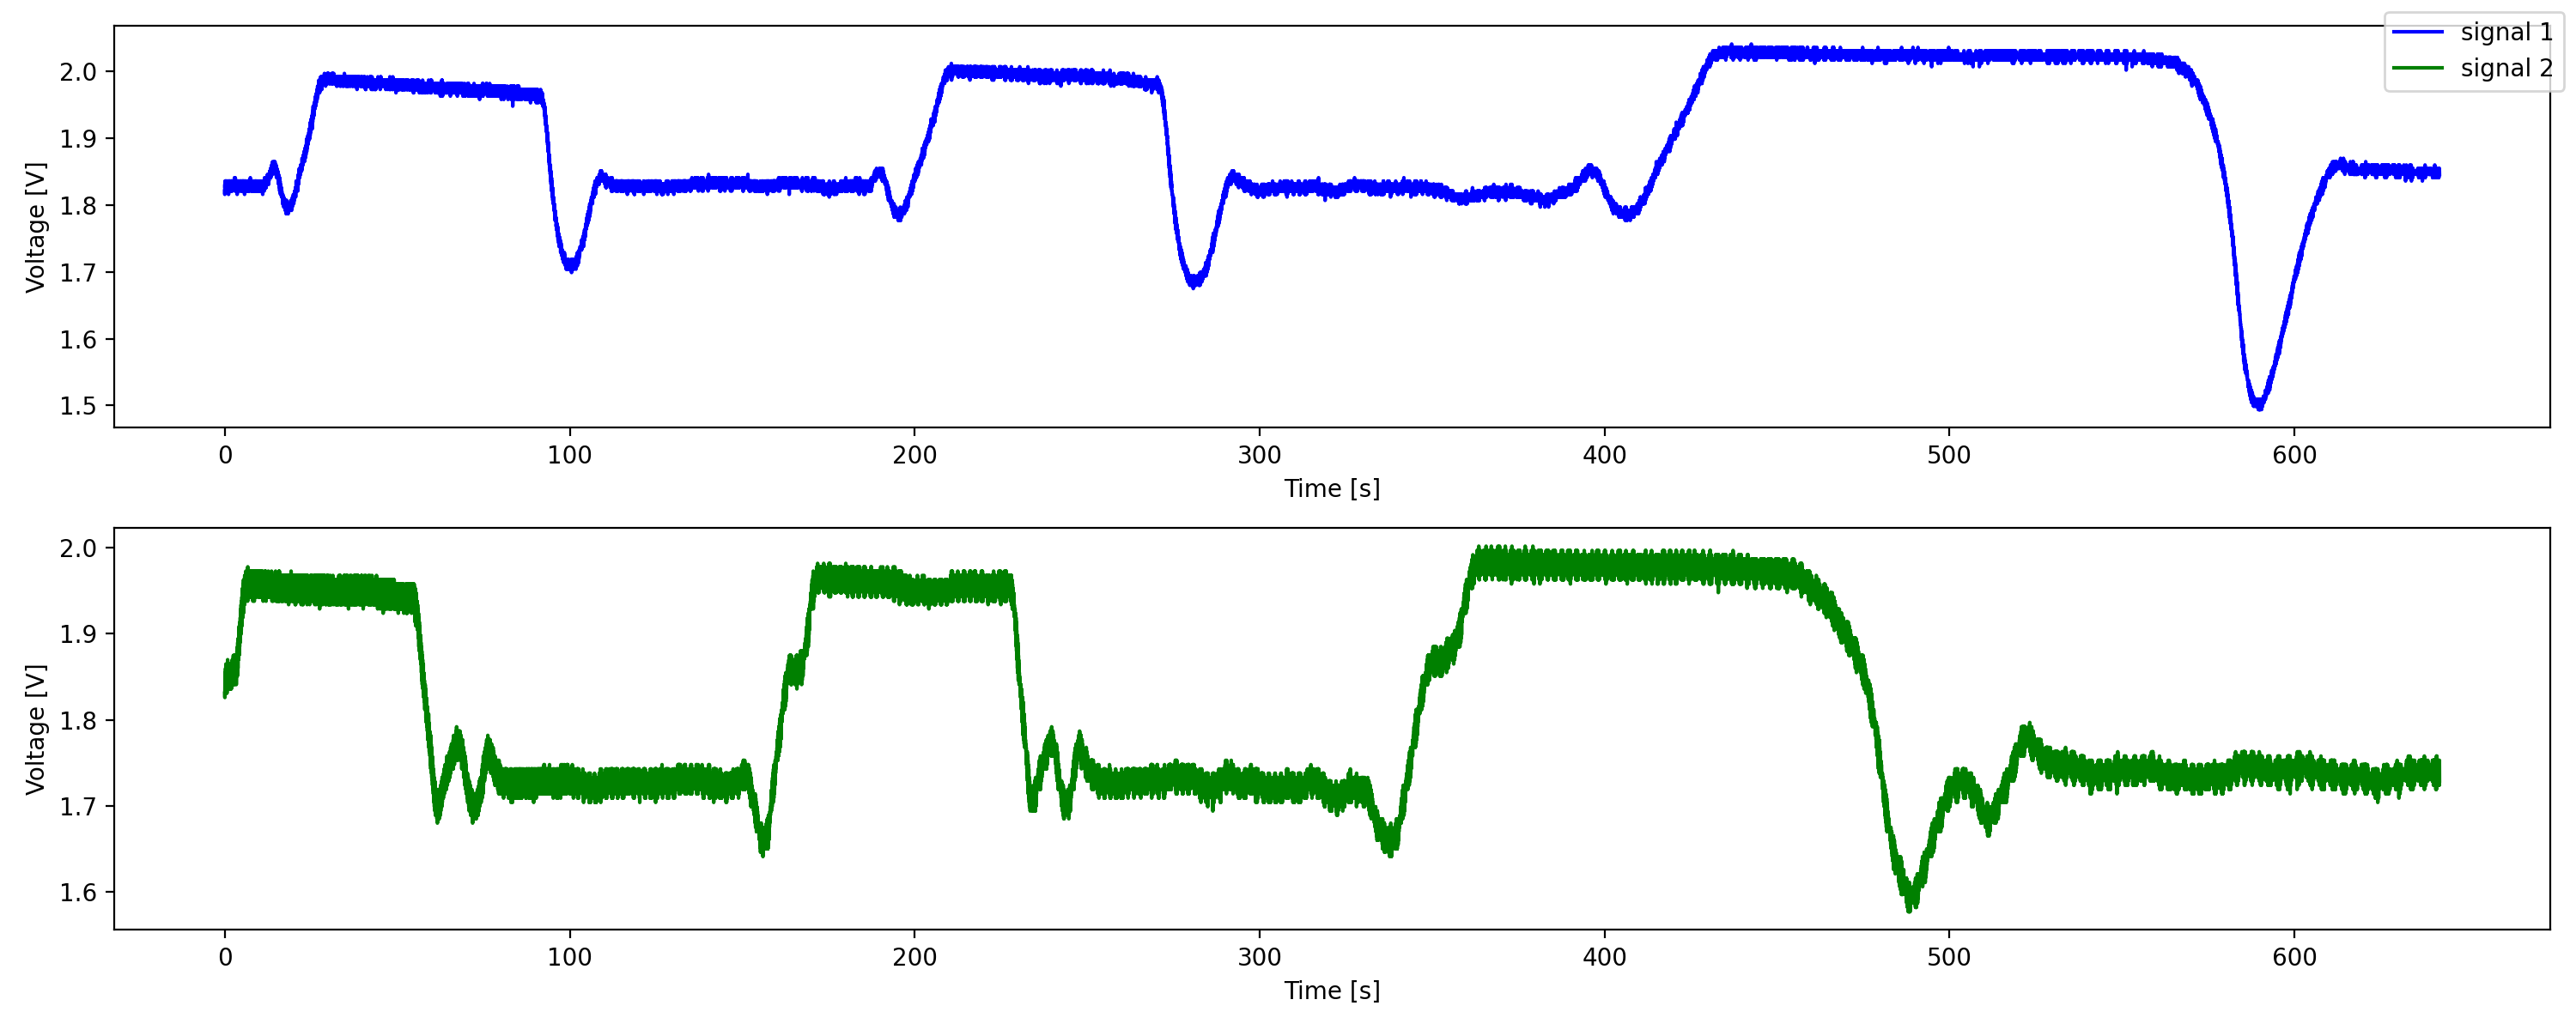

Library/drop_detection_tools.py:55: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  fig.legend(loc='best')


In [3]:
%matplotlib notebook

sig1, sig2, t = ddt.read_LV(folder='../../T-data/12-11/', filename='B-ol0.1-aq0.1-pause10.csv')

Library/drop_detection_tools.py:55: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  fig.legend(loc='best')


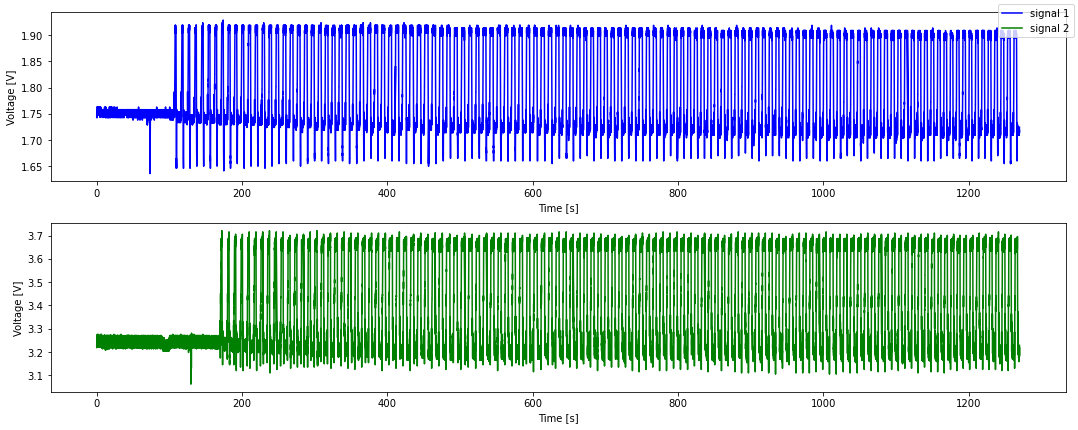

In [4]:
%matplotlib inline
sig1, sig2, t = ddt.read_LV(folder='../../T-data/2-12/', filename='B-ol2-aq2-pause10.csv')

<IPython.core.display.Javascript object>


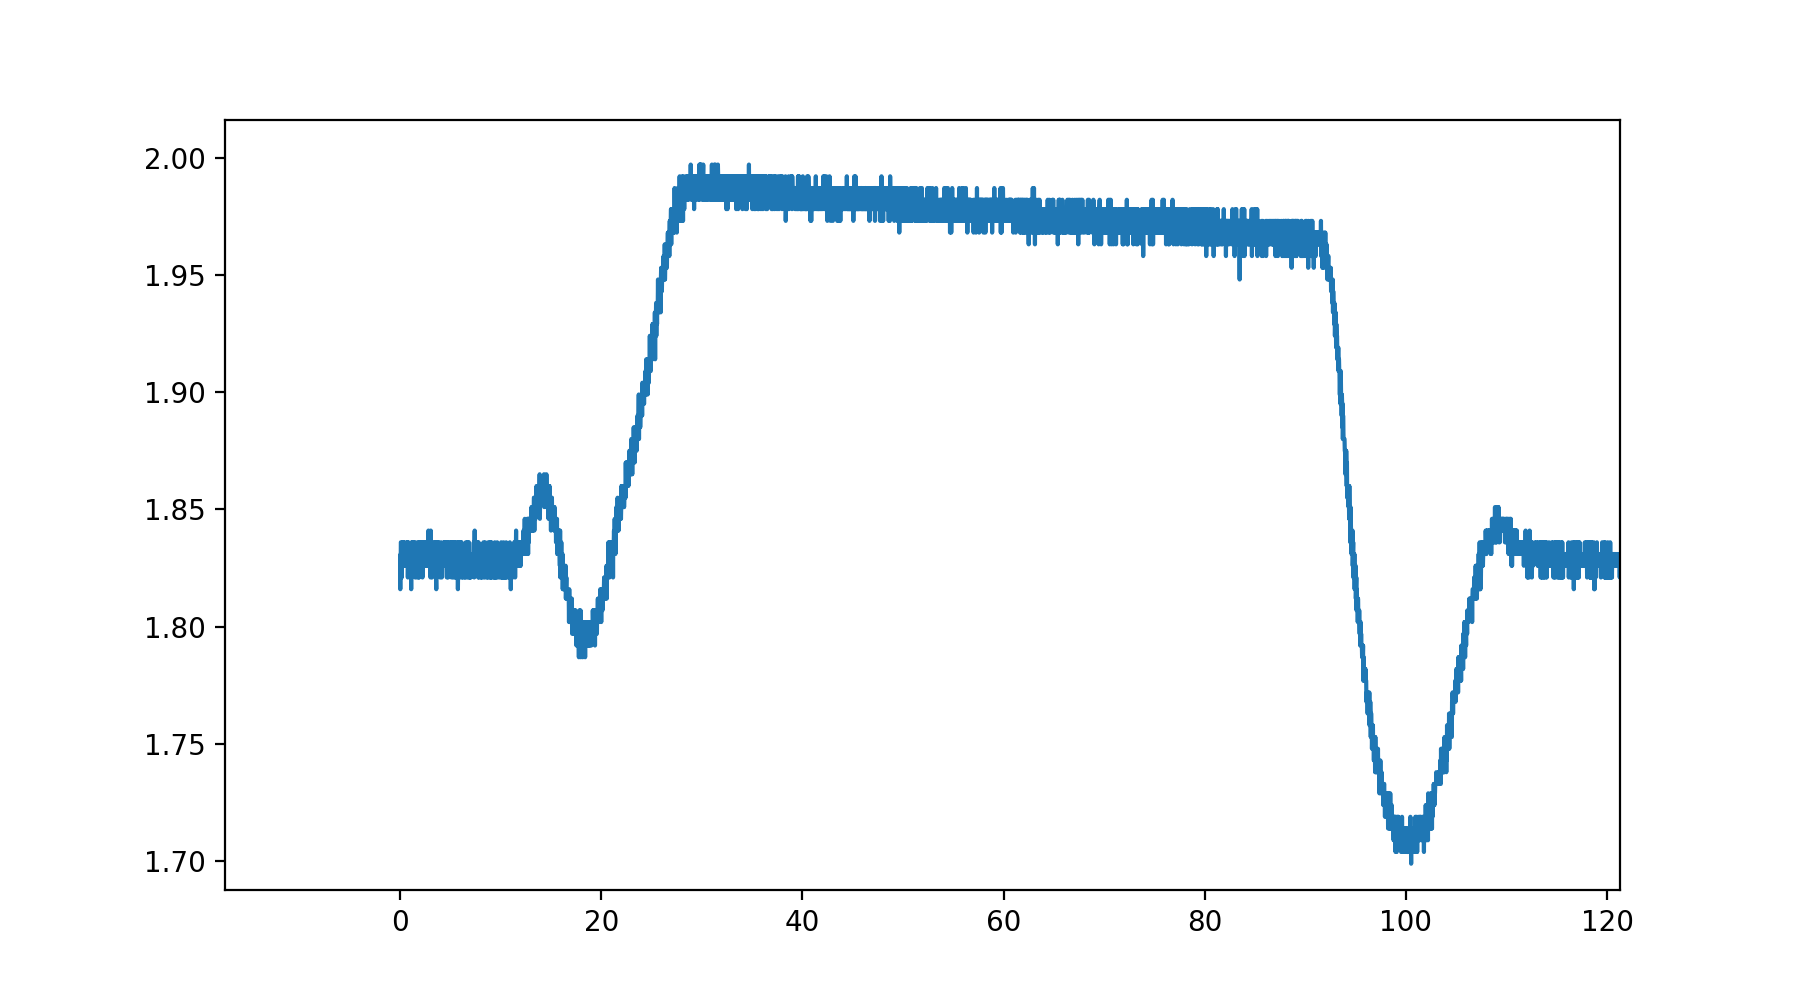

In [10]:
%matplotlib notebook

plt.figure(figsize=(9,5))
plt.plot(s_t, s_sig1)

<IPython.core.display.Javascript object>


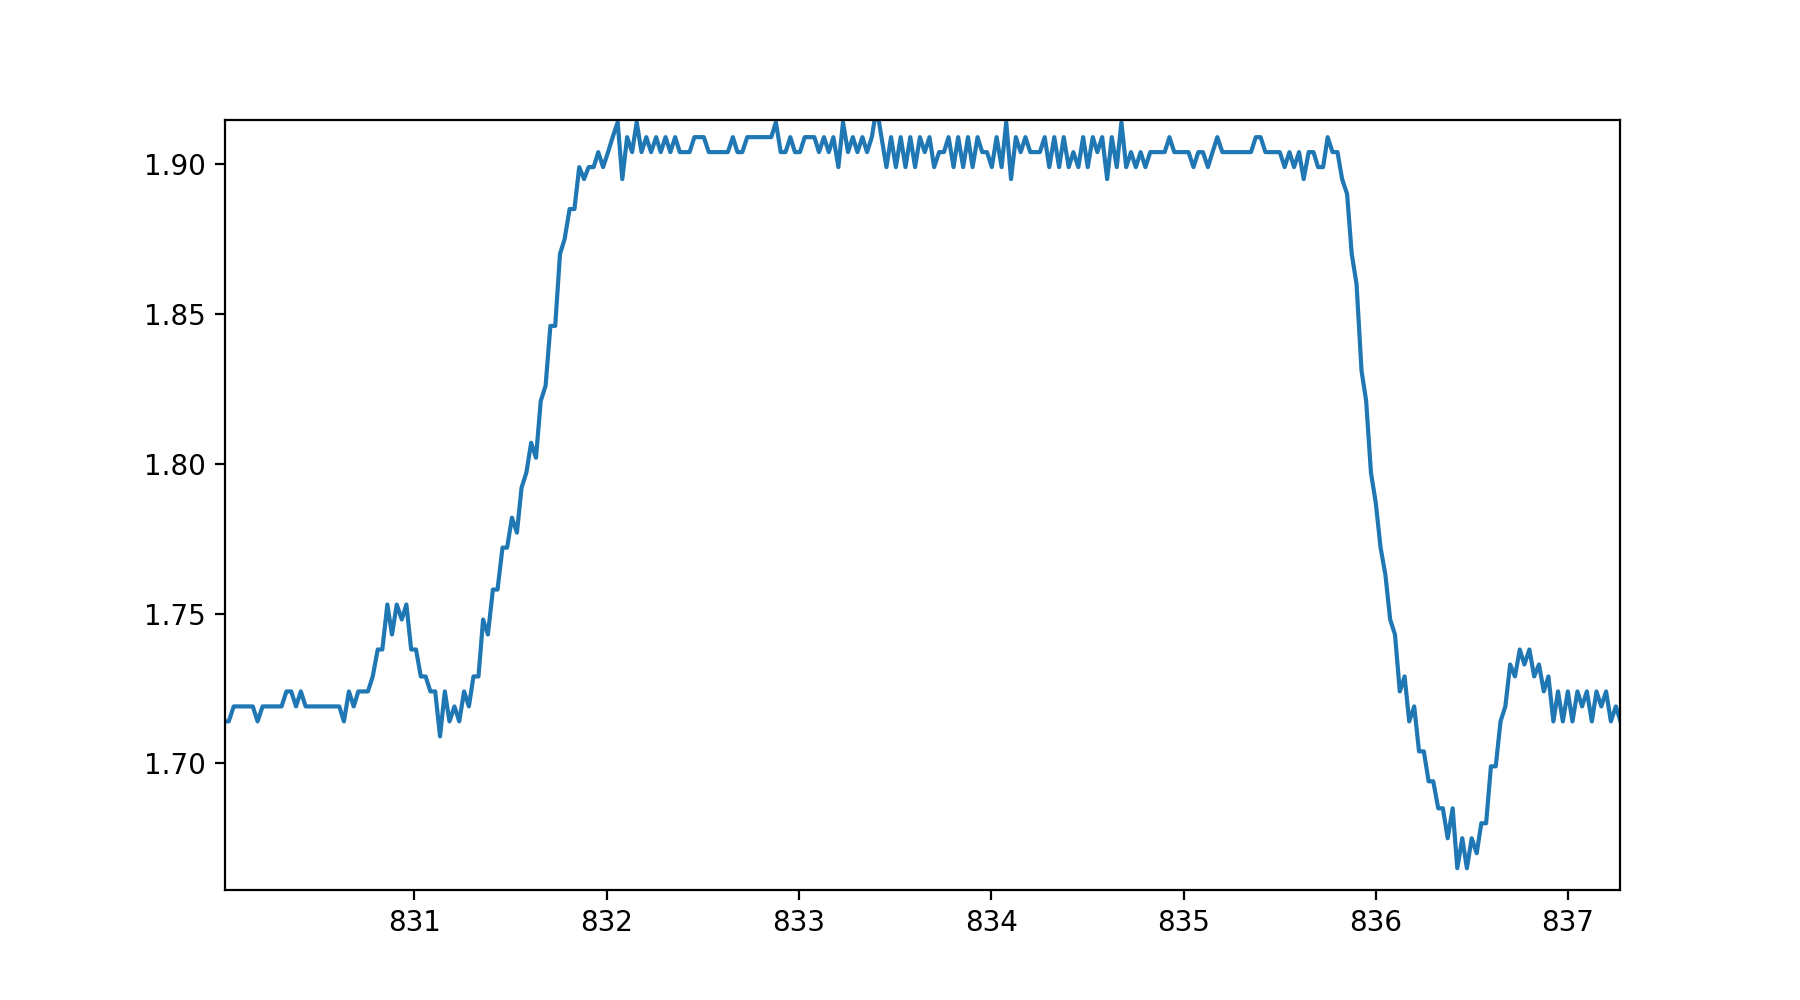

In [7]:
%matplotlib notebook

plt.figure(figsize=(9,5))
plt.plot(t, sig1)

<IPython.core.display.Javascript object>


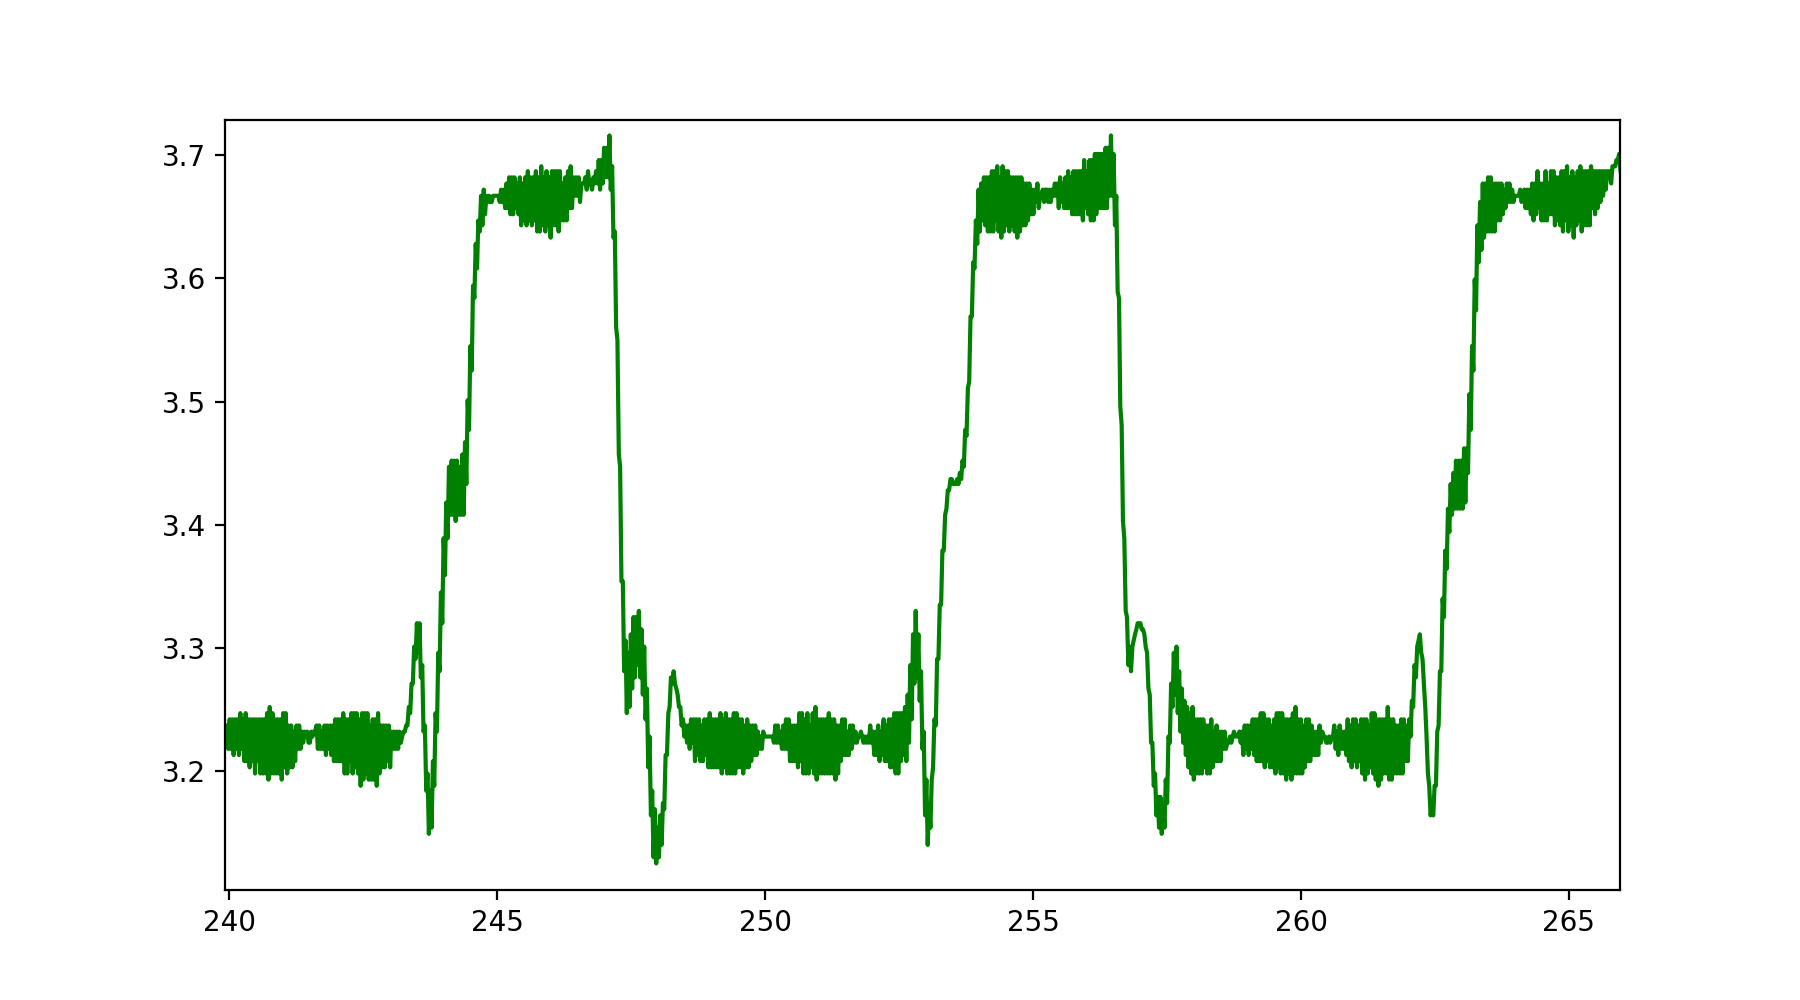

In [60]:
%matplotlib notebook

plt.figure(figsize=(9,5))
plt.plot(t, sig2, c='Green')

<IPython.core.display.Javascript object>


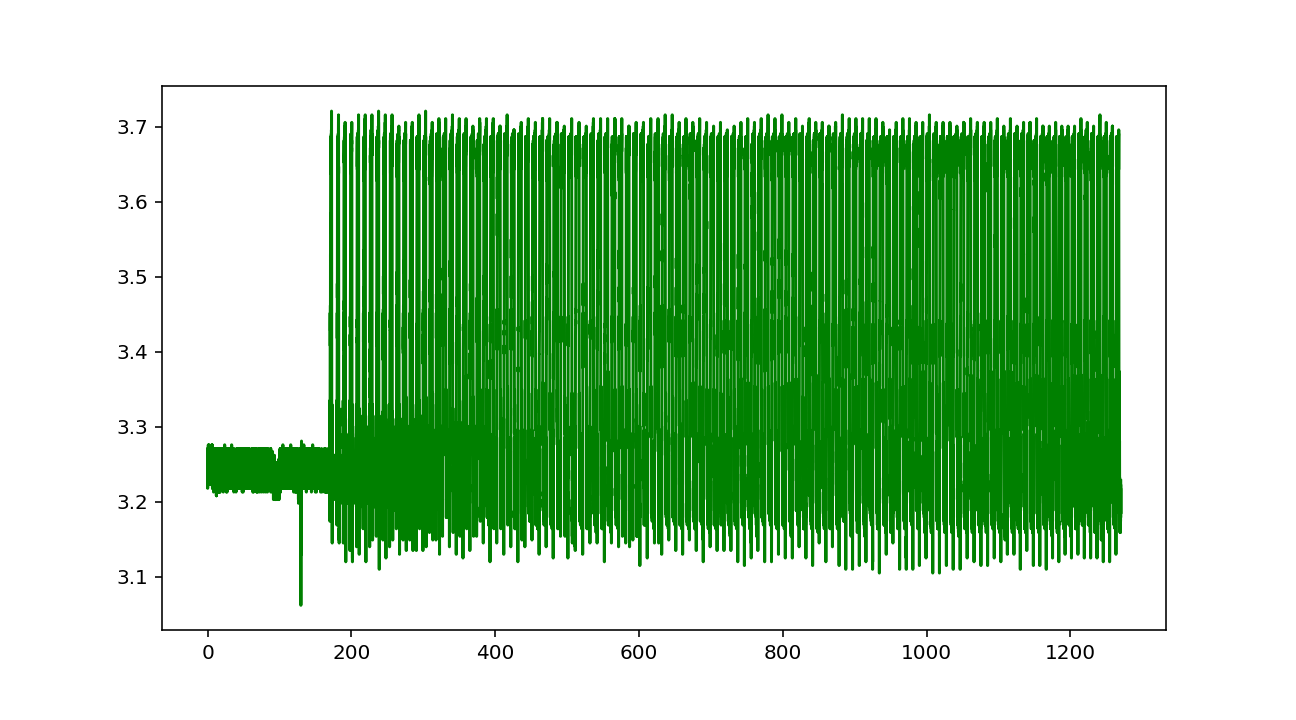

In [6]:
%matplotlib notebook
%matplotlib notebook

plt.figure(figsize=(9,5))
plt.plot(t, sig2, c='Green')

## Resonance of oscillations in ch2

1 5000


<IPython.core.display.Javascript object>


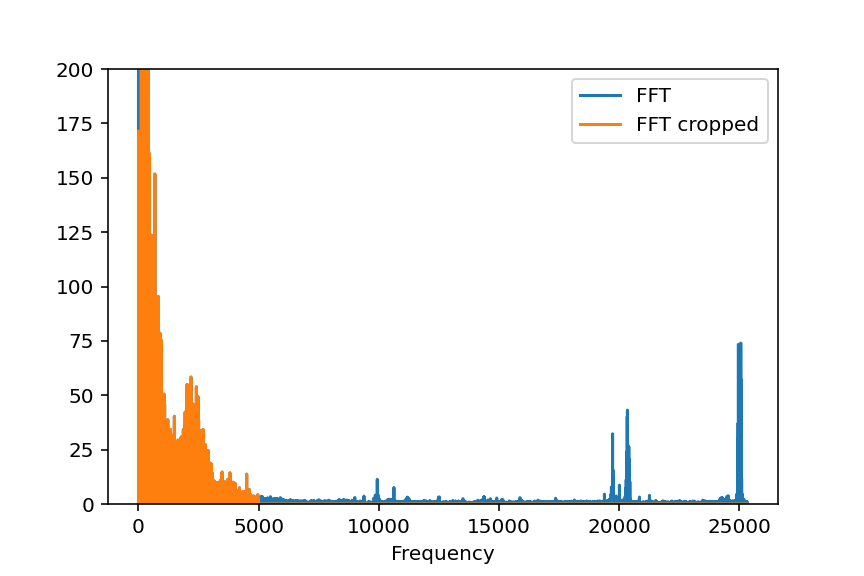

/home/alessandro/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/alessandro/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<IPython.core.display.Javascript object>


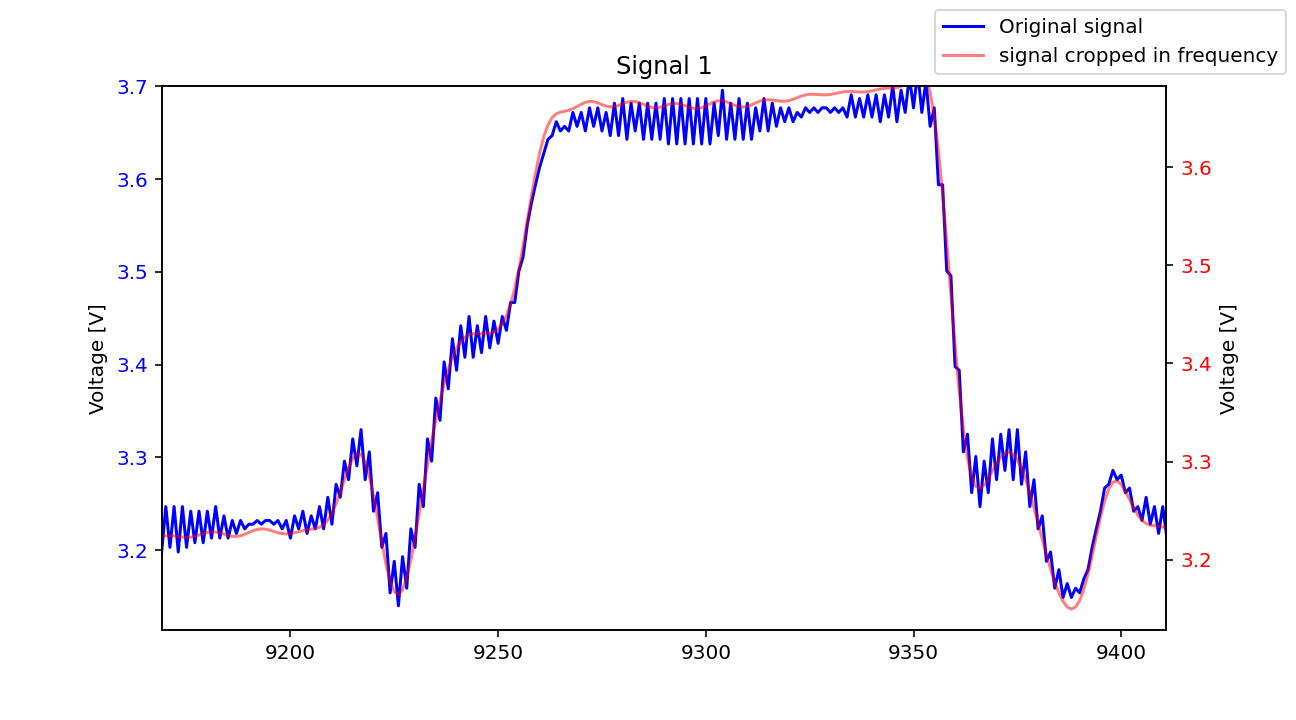

1.796829459966433


In [11]:
sig2_high = ddt.FFT_cropping(sig2, min_freq=0, max_freq=5000)

x_min = 0       # signal plot x min.
x_max = 20000   # signal plot x max.
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(9,5))

# Signal plot
color = 'blue'
ax1.set_title('Signal 1')
ax1.set_xlabel('')
ax1.set_ylabel('Voltage [V]')
ax1.plot(sig2[x_min:x_max], color = color, label='Original signal')
ax1.tick_params(axis = 'y', labelcolor = color)

# Filtered signal plot
color = 'red'
ax2 = ax1.twinx()   
ax2.set_xlabel('')
ax2.set_ylabel('Voltage [V]')                     
ax2.plot(sig2_high[x_min:x_max], color = color, label='signal cropped in frequency', alpha=0.5)
ax2.tick_params(axis = 'y', labelcolor = color)
fig.legend()

print(np.mean(sig1_high))

<IPython.core.display.Javascript object>


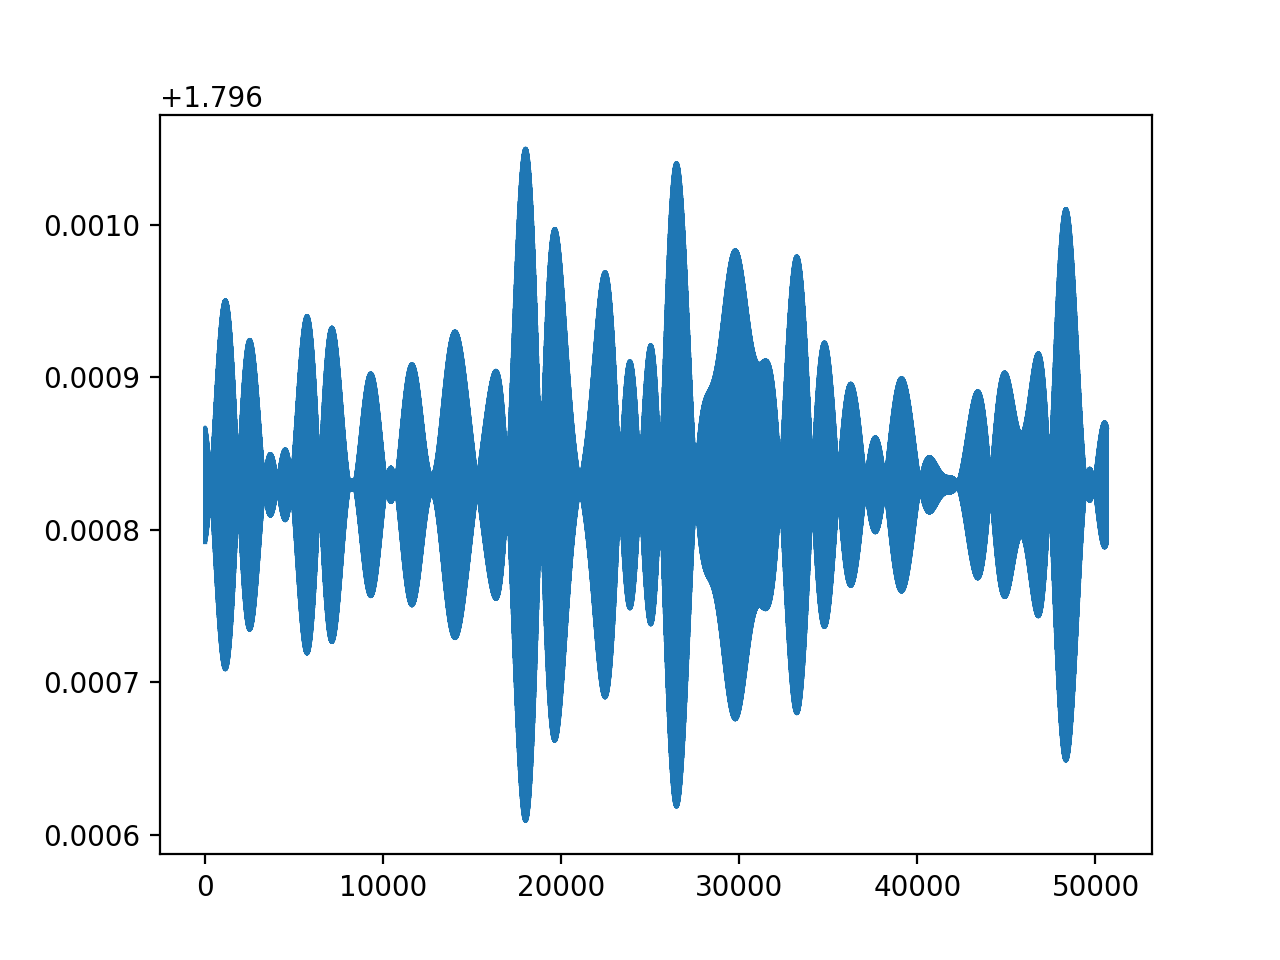

In [32]:
plt.figure()
plt.plot(sig1 - 2*sig1_high_b)

<IPython.core.display.Javascript object>


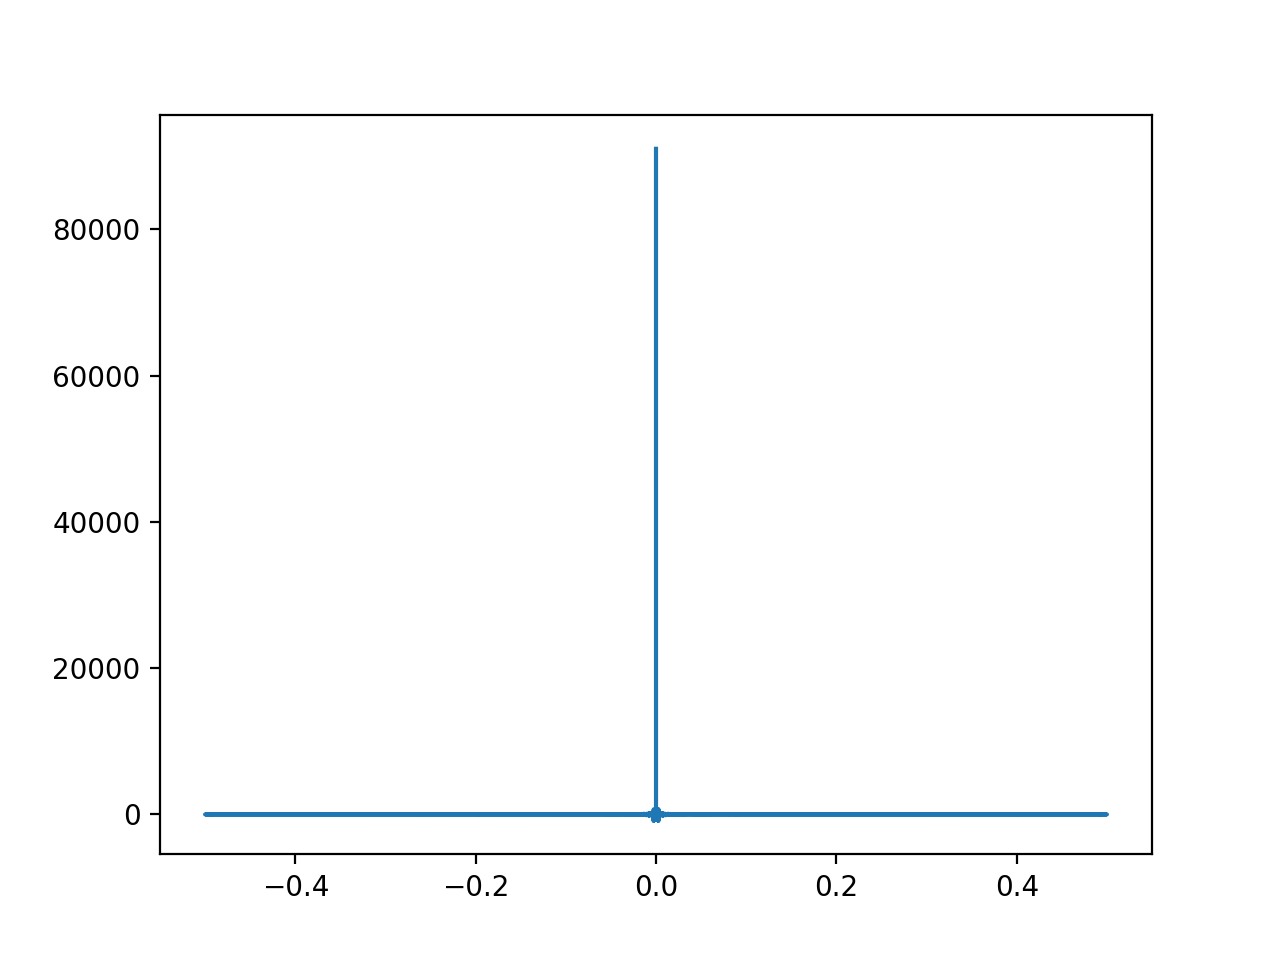

/home/alessandro/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [48]:
F_sig = np.fft.fft(sig1)
freq = np.fft.fftfreq(sig1.shape[-1])

plt.figure()
plt.plot(freq, F_sig)

<IPython.core.display.Javascript object>


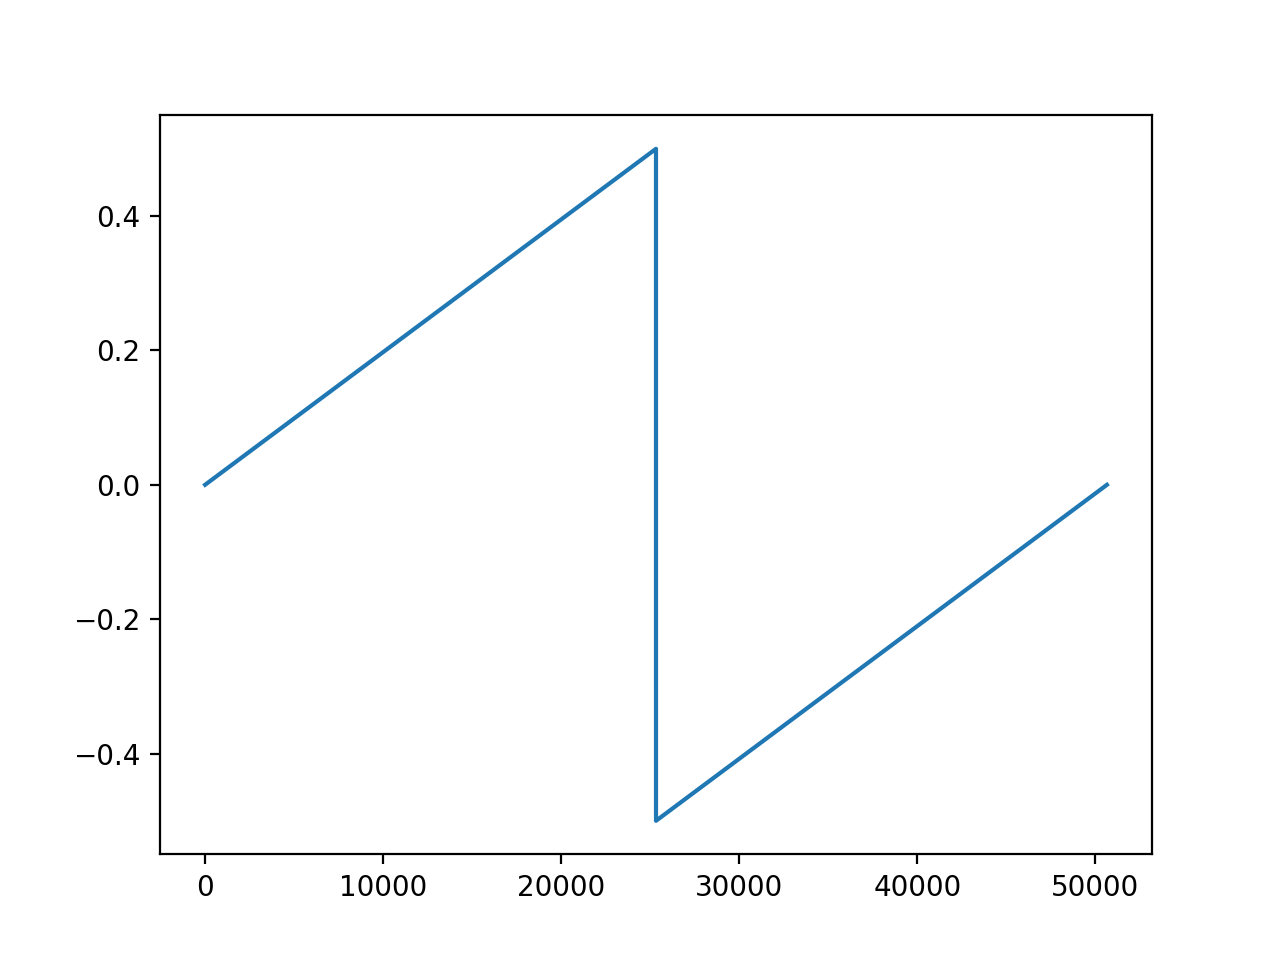

In [64]:
plt.figure()
plt.plot(np.fft.fftfreq(sig1.shape[-1]))

In [76]:
freq = np.fft.fftfreq(sig1.shape[-1] + 1)

freq[(len(freq) + 1)//2]

-0.5

<IPython.core.display.Javascript object>


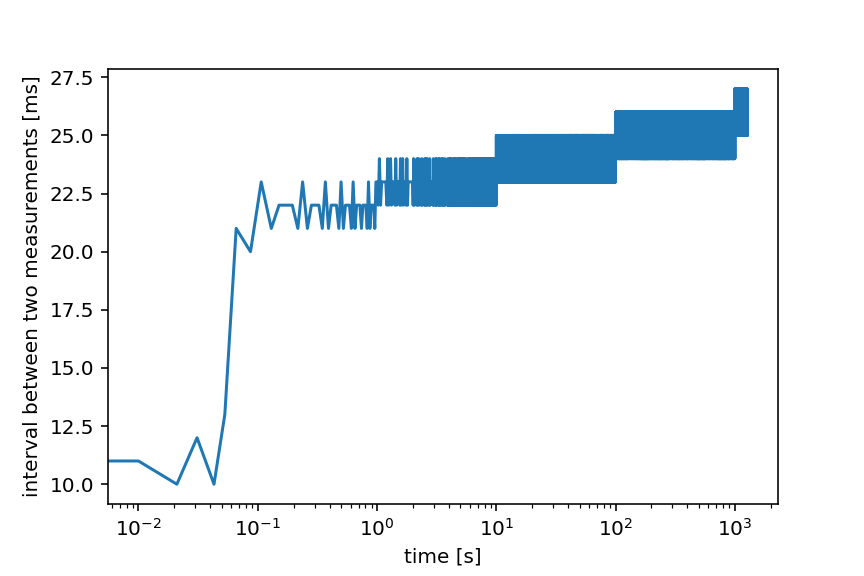

Text(0, 0.5, 'interval between two measurements [ms]')

In [42]:
%matplotlib notebook
plt.figure()
dt = (t[1:] - t[:-1])*10**3

plt.semilogx(t[:-1], dt)
# plt.plot(dt)

plt.xlabel('time [s]')
plt.ylabel('interval between two measurements [ms]')

<IPython.core.display.Javascript object>


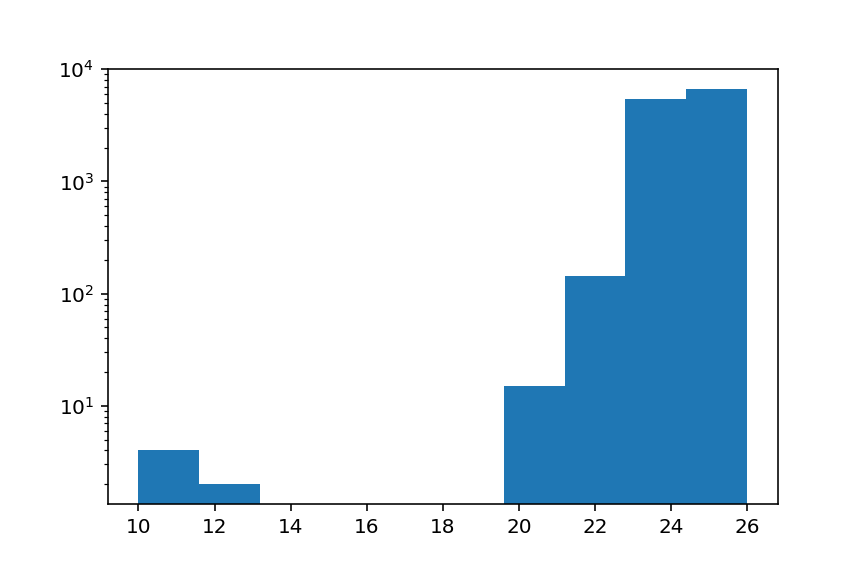

(array([4.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.500e+01, 1.440e+02, 5.390e+03, 6.683e+03]),
 array([10. , 11.6, 13.2, 14.8, 16.4, 18. , 19.6, 21.2, 22.8, 24.4, 26. ]),
 <a list of 10 Patch objects>)

In [36]:
plt.figure()
plt.hist(dt,log=True)


In [47]:
np.arange(0,1.01,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [31]:
# testing

old_t = np.arange(50)
old_sig = np.sin(0.1*old_t)

new_sig, new_t = ddt.resample(old_sig, old_t, dt=2)

In [4]:
old_t = t
old_sig = sig1

new_sig, new_t = ddt.resample(old_sig, old_t, dt=0.01)

<IPython.core.display.Javascript object>


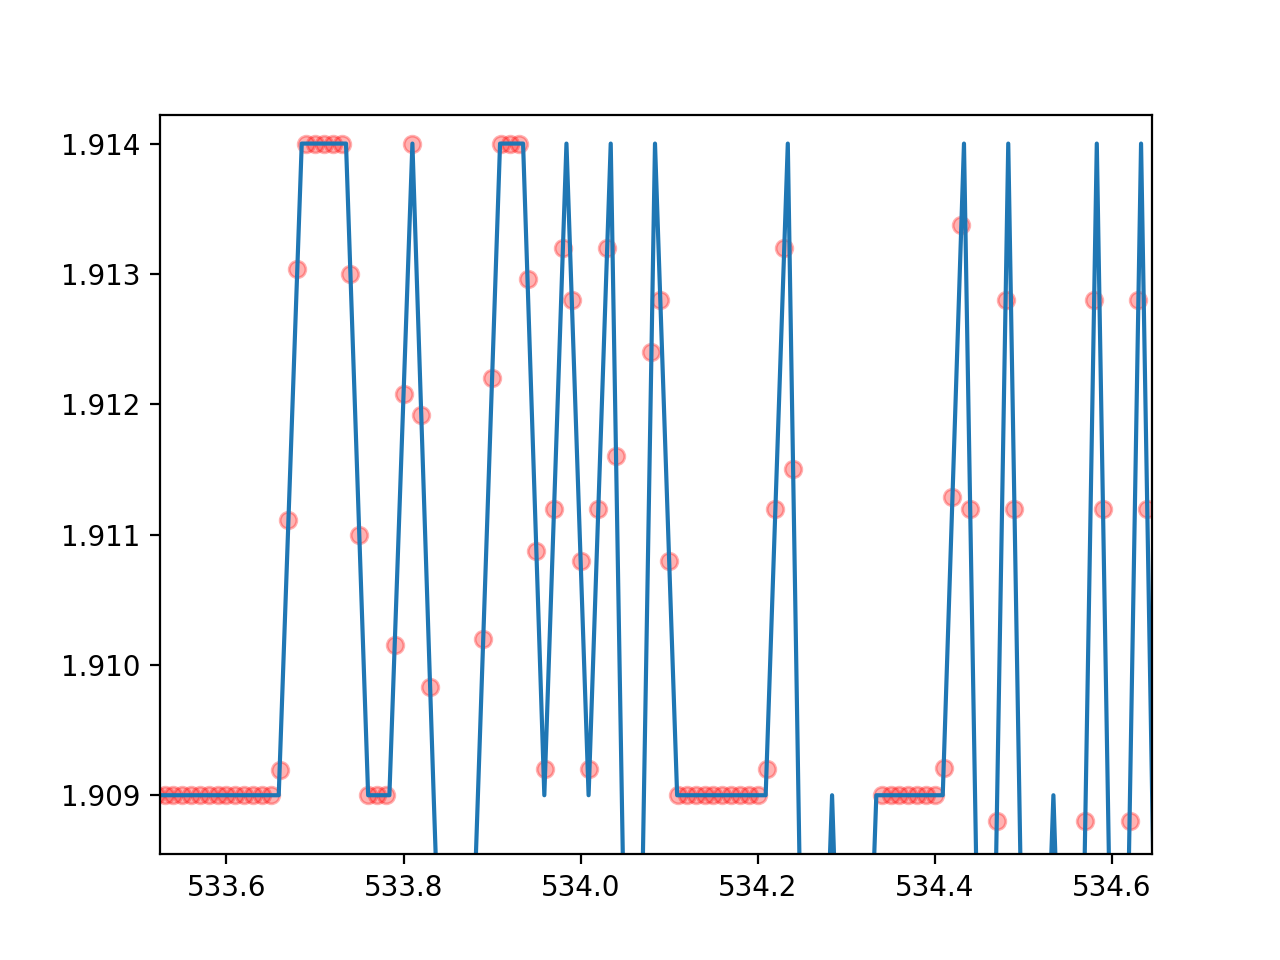

In [5]:
%matplotlib notebook
plt.figure()
plt.plot(old_t,old_sig)
plt.scatter(new_t, new_sig, color='red', alpha=0.3)

In [10]:
new_sig

array([[0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.]])